# Multi Layer Convolutional Network

Expand on Simple CNN


In [1]:
# if using tensorflow, import keras as tf.keras
import os
import numpy as np
#import keras

import tensorflow as tf
from tensorflow import keras

import numpy as np

from tensorflow import keras
from matplotlib import pyplot as plt

# print some info
print('backend:', keras.backend.backend() ,', version:', keras.__version__, ', image_data_format:' , keras.backend.image_data_format())
is_channels_first = (keras.backend.image_data_format() == 'channels_first')

# display warning message if model already exists
if is_channels_first:
    model_file_name = 'channels_first_cnn_multi_model.h5'
else:
    model_file_name = 'channels_last_cnn_multi_model.h5'

if os.path.isfile(model_file_name):
    print('*** WARNING: Delete model file, if you would like to retrain ***')
    print('Model File Name:', model_file_name)
    delete_command = input('Do you wish to delete model file: ' + model_file_name + '? [Y]')
    if delete_command == 'Y' or delete_command =='':
        os.remove(model_file_name)
        is_mode_exists = False
        print('model file has been deleted:', model_file_name)
        
if os.path.isfile(model_file_name):
    is_model_exists = True
else:
    is_model_exists = False


backend: tensorflow , version: 2.2.4-tf , image_data_format: channels_last


loading MNIST data...
train data size: (60000, 28, 28)
train label (expected) value size: (60000,)
test data size: (10000, 28, 28)
test expected value: (10000,)


displaying few training samples
MNIST data. Offset: 800


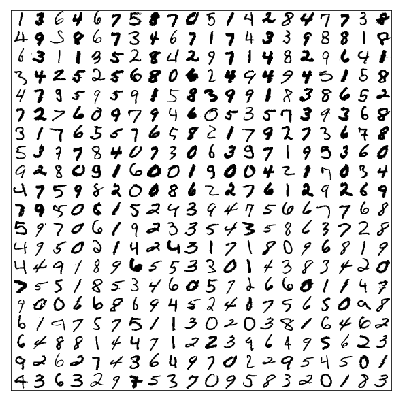

In [2]:
# get mnist data
mnist = keras.datasets.mnist

print('loading MNIST data...')

(x_train, y_train),(x_test, y_test) = mnist.load_data()

#show the "shape" of downloaded data
print('train data size:', x_train.shape)
print('train label (expected) value size:', y_train.shape)
print('test data size:', x_test.shape)
print('test expected value:',y_test.shape)

print('\n\ndisplaying few training samples')

#function to copy 1 mage to larger image map
def copy_image(target , ty, tx, src):
    for y in range(28):
        for x in range(28):
            target[ty*28+y][tx*28+x] = src[y][x]
    return target

# show 20 x 20
ysize = 20
xsize = 20
start_offset = 800
base_index = start_offset +(ysize * xsize)

print('MNIST data. Offset:', start_offset)

image = np.zeros((28*ysize, 28*xsize), dtype=np.int)

for y in range(ysize):
    for x in range(xsize):
        index = y*xsize + x
        src = x_train[index + base_index]
        image = copy_image(image , y ,x , src)

%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(7,7))
plt.grid(False)
plt.xticks([])
plt.yticks([])
plt.imshow(image , cmap='gray_r')
plt.show()
plt.close()

### Reshape to fit CNN network

The code below will reshape the MNIST data format to fit CNN network 4 tuple ( count, value ,x y) or (count, x,y,value).

Though tensorflow uses image_data_format() of "channels_last", it is ALWAYS good idea to check and convert training data to fit the image data format.

In [3]:
# shape data for CNN

# convert the shape of data depending on the image data format
is_channels_first = (keras.backend.image_data_format() == 'channels_first')

if is_channels_first:
    x_train2 = x_train.reshape(x_train.shape[0], 1, 28, 28)
    x_test2 = x_test.reshape(x_test.shape[0], 1, 28, 28)
    input_shape = (1, 28, 28)
else:
    x_train2 = x_train.reshape(x_train.shape[0], 28, 28, 1)
    x_test2 = x_test.reshape(x_test.shape[0], 28, 28, 1)
    input_shape = (28, 28, 1)

# get hot label output

y_train2 = keras.utils.to_categorical(y_train, num_classes=10)
y_test2 = keras.utils.to_categorical(y_test, num_classes=10)

# normalize the data
x_train2 = x_train2.astype('float32')
x_test2 = x_test2.astype('float32')

# convert the data from 0 to 1.0
x_train2, x_test2 = x_train2 / 255, x_test2 / 255

print('x train shape:',x_train2.shape)
print('y train shape:',y_train2.shape)
print('x test shape:',x_test2.shape)
print('y test shape:',y_test2.shape)

x train shape: (60000, 28, 28, 1)
y train shape: (60000, 10)
x test shape: (10000, 28, 28, 1)
y test shape: (10000, 10)


### setup the model
Added extra 32 node Conv2D and 64 node Conv2D

In [4]:
print('is model exists:', is_model_exists)
if not is_model_exists:
    # setup model and compile

    model = keras.models.Sequential()
    model.add( keras.layers.Conv2D(32, kernel_size=(3,3), input_shape=input_shape , activation='relu' ))
    model.add( keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu' ))
    model.add( keras.layers.MaxPooling2D(pool_size=(2,2)))
    model.add( keras.layers.Dropout(0.2))
    
    model.add( keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu' ))
    model.add( keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu' ))
    model.add( keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add( keras.layers.Dropout(0.4))
    model.add( keras.layers.Flatten())
    model.add( keras.layers.Dense(265, activation='relu'))
    model.add( keras.layers.Dropout(0.5))
    model.add( keras.layers.Dense(10, activation='softmax'))

    # compile to model
    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # show summary
    model.summary()
    #train the model with train data
    fit_history = model.fit( x_train2, 
                        y_train2, 
                        epochs=40 , 
                        batch_size=200, 
                        validation_data=(x_test2,y_test2))
    
    print('*** Writing to model file:', model_file_name)
    model.save(model_file_name)
    
else:
    print('*** Did not train as model exists ***')


is model exists: False
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
________________________________________________________________

60000/60000 [==============================] - 8s 131us/sample - loss: 0.0113 - acc: 0.9964 - val_loss: 0.0169 - val_acc: 0.9956
Epoch 39/40
60000/60000 [==============================] - 8s 130us/sample - loss: 0.0114 - acc: 0.9965 - val_loss: 0.0168 - val_acc: 0.9949
Epoch 40/40
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0090 - acc: 0.9971 - val_loss: 0.0163 - val_acc: 0.9957
*** Writing to model file: channels_last_cnn_multi_model.h5


### as long as the model loss continues to decrease, you should extend the epoch to get better results

The accuracy is around 0.995x to 0.996x which is slightly better than a simple CNN model.

The model is staring to over-fit a little from epoch 30+


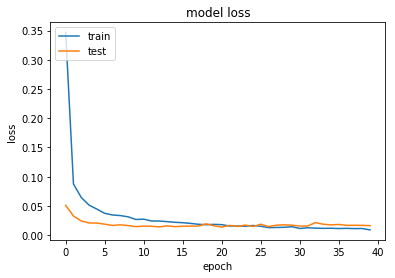

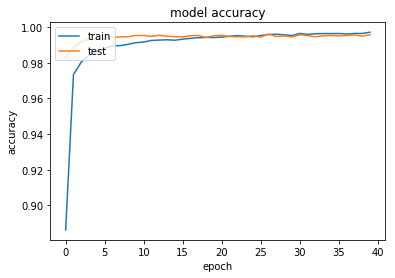

In [5]:
if not is_model_exists:
    # show procession of training...
    plt.plot(fit_history.history['loss'])
    plt.plot(fit_history.history['val_loss'])

    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

    plt.plot(fit_history.history['acc'])
    plt.plot(fit_history.history['val_acc'])

    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


In [6]:
# predict for my test data
print('*** Reading from saved model:', model_file_name)
model = keras.models.load_model(model_file_name)
predictions = model.predict(x_test2)

my_matrix = np.zeros( (10,10), dtype='int')

# count of good guesses
count_matrix = np.zeros( (10,), dtype='int')
good_matrix = np.zeros( (10,), dtype='int')

# iterate through 10,000 test data
for i in range(10000):
    count_matrix[y_test[i]] +=1
    guess = np.argmax(predictions[i])
    if guess == y_test[i]:
        good_matrix[guess] +=1
    else:
        # increment [expected][guess] matrix
        my_matrix[y_test[i]][guess] += 1

# show good matrix
print('Good guesses:')
for i in range(10):
    percent = "( {:.2f}".format((good_matrix[i] * 100.0) / count_matrix[i]) + " %)"
    print('match count for:',i,'=', good_matrix[i] , '/',count_matrix[i] , percent)


*** Reading from saved model: channels_last_cnn_multi_model.h5
Good guesses:
match count for: 0 = 978 / 980 ( 99.80 %)
match count for: 1 = 1134 / 1135 ( 99.91 %)
match count for: 2 = 1028 / 1032 ( 99.61 %)
match count for: 3 = 1007 / 1010 ( 99.70 %)
match count for: 4 = 979 / 982 ( 99.69 %)
match count for: 5 = 888 / 892 ( 99.55 %)
match count for: 6 = 953 / 958 ( 99.48 %)
match count for: 7 = 1021 / 1028 ( 99.32 %)
match count for: 8 = 972 / 974 ( 99.79 %)
match count for: 9 = 997 / 1009 ( 98.81 %)



Confusion Matrix


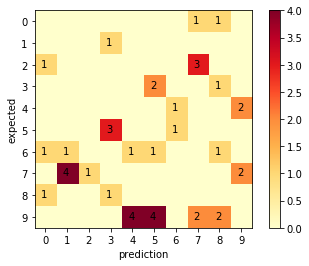

In [7]:
print('\nConfusion Matrix')

fig = plt.figure()
plt.xticks( range(10))
plt.yticks( range(10))

for y in range(10):
    for x in range(10):
        if my_matrix[y][x] != 0:
            # put text
            plt.text( x-len(str(x)) * 0.2, y+0.1, str(my_matrix[y][x]))
plt.xlabel('prediction')
plt.ylabel('expected')
plt.imshow(my_matrix, cmap='YlOrRd')
plt.colorbar()
plt.show()
plt.close()

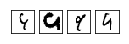

In [8]:
non_match_list = []
for i in range(10000):
    if y_test[i] == 9:
        guess = np.argmax(predictions[i])
        if guess == 4:
            non_match_list.append(i)

fig = plt.figure( figsize = (10,2))

for i in range(len(non_match_list)):
    plt.subplot(1,20,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    index = non_match_list[i]
    plt.imshow(x_test[index], cmap='gray_r')
plt.show()
plt.close()